# DS 3000 - Practicum 1

**Student Name**: Annabelle Chung, Bella Chin, Fanta Kebe, Jerry Zhang

**Date**: Sept. 29 2024


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.


## Question 1 - The DS Problem

In your own words, formulate the Data Science problem that you were given.


The Data Science problem that we were given is to explore and gather information about flights that depart from OR arrive in Arizona, Nevada and California. This information ranges from air traffic to flight delays and will take into consideration different regions and airports.

## Question 2 - Prepare the Data (10pts)

1. Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed).
2. Analyze the data to determine what preprocessing steps are needed. Perform the required data preparation steps. At a minimum, ensure that you handle both missing and invalid values. Justify the approach that is taken to prepare the data for analysis.
3. At a high level explain what the dataset is about and provide at least three visualizations to support your explanation of DS problem from Question 1. Note: this explanation and visualizations should be relevant to the DS Problem in question 1.

In [ ]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153296 entries, 0 to 153295
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   FL_DATE       153296 non-null  object 
 1   CARRIER_CODE  153296 non-null  object 
 2   TAIL_NUM      153206 non-null  object 
 3   FL_NUM        153296 non-null  int64  
 4   ORIGIN        153296 non-null  object 
 5   ORIGIN_ST     153296 non-null  object 
 6   DEST          153296 non-null  object 
 7   DEST_ST       153295 non-null  object 
 8   DEP_TIME      152386 non-null  float64
 9   DEP_DELAY     152386 non-null  float64
 10  ARR_TIME      152328 non-null  float64
 11  ARR_DELAY     152129 non-null  float64
 12  ELAPSED_TIME  152129 non-null  float64
 13  DISTANCE      153295 non-null  float64
dtypes: float64(6), int64(1), object(7)
memory usage: 16.4+ MB
FL_DATE            0
CARRIER_CODE       0
TAIL_NUM          90
FL_NUM             0
ORIGIN             0
ORIGIN_ST        

<ipython-input-7-ec658d25e0fd>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data.dropna(subset=['ARR_DELAY', 'ELAPSED_TIME'], inplace=True)
<ipython-input-7-ec658d25e0fd>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data['DEP_TIME'] = flight_data['DEP_TIME'].astype("int64")
<ipython-input-7-ec658d25e0fd>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

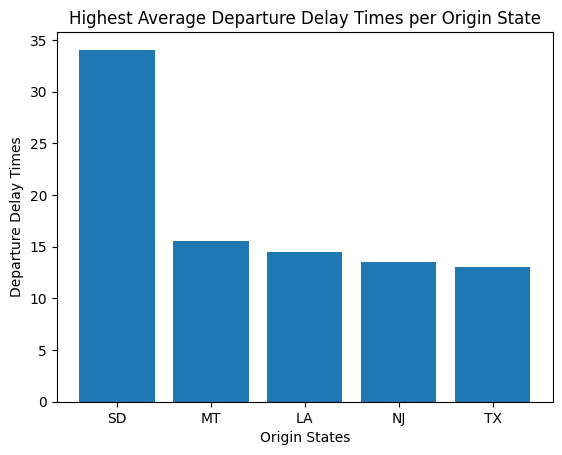

<ipython-input-7-ec658d25e0fd>:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_elapsed = flight_data.groupby(['CARRIER_CODE'], as_index=False)['ELAPSED_TIME'].mean()


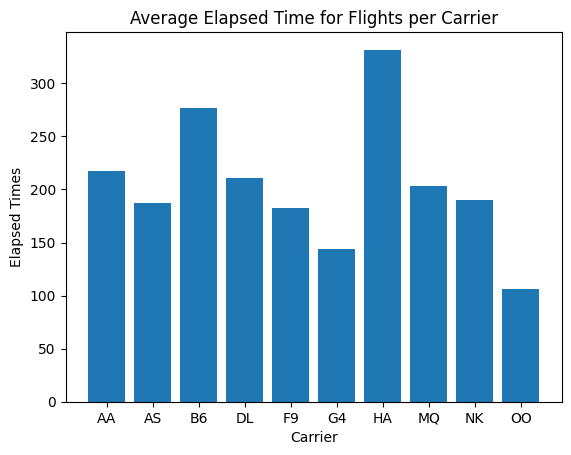

<ipython-input-7-ec658d25e0fd>:75: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  least_arr_delay = flight_data.groupby(['DEST_ST'], as_index=False)['ARR_DELAY'].mean()


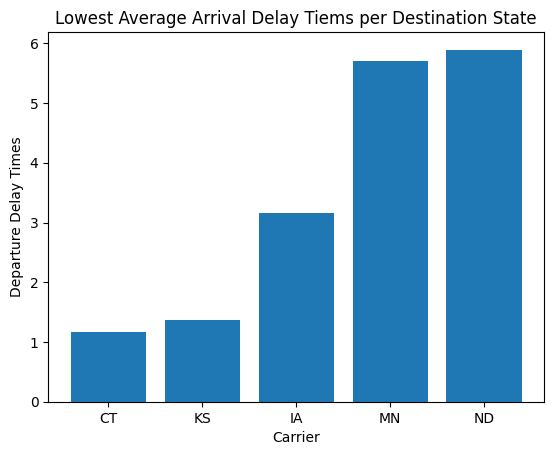

In [ ]:
# loading in the data

flight_data = pd.read_csv('/content/2019_ONTIME_REPORTING_FSW.csv', delimiter=',', on_bad_lines='skip')

# 2.1 - checking data

flight_data.head()
flight_data.info()

# coverting necessary variables to suitable data types

flight_data['FL_DATE'] = flight_data['FL_DATE'].astype("string")
flight_data['CARRIER_CODE'] = flight_data['CARRIER_CODE'].astype("category")
flight_data['FL_NUM'] = flight_data['FL_NUM'].astype("string")
flight_data['TAIL_NUM'] = flight_data['TAIL_NUM'].astype("string")
flight_data['ORIGIN'] = flight_data['ORIGIN'].astype("category")
flight_data['ORIGIN_ST'] = flight_data['ORIGIN_ST'].astype("category")
flight_data['DEST'] = flight_data['DEST'].astype("category")
flight_data['DEST_ST'] = flight_data['DEST_ST'].astype("category")

# 2.2 - analyzing data

# seeing how many missing values there are in each column
print(flight_data.isnull().sum())

# seeing the percentage of missing values in each column
print(flight_data.isnull().mean()*100)

# seeing how many missing values there can be in a single row at any time
print(flight_data.isnull().sum(axis=1).sort_values(ascending=False))

# deleting rows that have 4 out of 14 rows missing (approximately 28% missing data)
flight_data = flight_data[flight_data.isnull().sum(axis=1) < 4]

# ARR_TIME and DEP_TIME shouldn't contain values that exceed 2400 because the max time is 2400 so filtering for this, deleting is okay since this only makes up around ~1% of all data
flight_data = flight_data[(flight_data['DEP_TIME'] <= 2400.0)]
flight_data = flight_data[(flight_data['ARR_TIME'] <= 2400.0)]

# deleting missing data in ARR_DELAY, ELAPSED_TIME since at this point they only make up ~0.1% of the data in that column
flight_data.dropna(subset=['ARR_DELAY', 'ELAPSED_TIME'], inplace=True)

# converting these after data clean since int64 can't hold null values, leaving elapsed time as float since it would need the decimals
flight_data['DEP_TIME'] = flight_data['DEP_TIME'].astype("int64")
flight_data['DEP_DELAY'] = flight_data['DEP_DELAY'].astype("int64")
flight_data['ARR_TIME'] = flight_data['ARR_TIME'].astype("int64")
flight_data['DISTANCE'] = flight_data['DISTANCE'].astype("int64")
flight_data['ARR_DELAY'] = flight_data['ARR_DELAY'].astype("int64")

# checking everything worked
print(flight_data.isnull().sum())
print(flight_data.isnull().mean()*100)

# 2.3 - the visualizations

# visualizing highest departure delay average time per state
most_dep_delay = flight_data.groupby(['ORIGIN_ST'], as_index=False)['DEP_DELAY'].mean()
sorted = most_dep_delay.sort_values(by=['DEP_DELAY'], ascending=False)
sorted_5 = sorted.head()
plt.bar(sorted_5['ORIGIN_ST'], sorted_5['DEP_DELAY'])
plt.title('Highest Average Departure Delay Times per Origin State')
plt.xlabel('Origin States')
plt.ylabel('Departure Delay Times')
plt.show()

# visualizing average elapsed time for flights for first 10 airlines (alphabetical order)
avg_elapsed = flight_data.groupby(['CARRIER_CODE'], as_index=False)['ELAPSED_TIME'].mean()
elapsed_10 = avg_elapsed.head(10)
plt.bar(elapsed_10['CARRIER_CODE'], elapsed_10['ELAPSED_TIME'])
plt.title('Average Elapsed Time for Flights per Carrier')
plt.xlabel('Carrier')
plt.ylabel('Elapsed Times')
plt.show()

# visualizing states with the lowest arrival delay average time
least_arr_delay = flight_data.groupby(['DEST_ST'], as_index=False)['ARR_DELAY'].mean()
least = least_arr_delay.sort_values(by=['ARR_DELAY'], ascending=True)
least_5 = least.head()
plt.bar(least_5['DEST_ST'], least_5['ARR_DELAY'])
plt.title('Lowest Average Arrival Delay Tiems per Destination State')
plt.xlabel('Carrier')
plt.ylabel('Departure Delay Times')
plt.show()


## 2.3

At a high level explain what the dataset is about and provide at least three visualizations to support your explanation of DS problem from Question 1. Note: this explanation and visualizations should be relevant to the DS Problem in question 1.

This dataset is about flights that depart or arrive to airports in Calirfonia, Nevada and Arizona. It includes all relevant identifying information for a flight's aircraft such as airline (CARRIER_CODE) and unique identifier of aircraft (TAIL_NUM). Also, identifying inforamtion about the flight such as date of the flight (FL_DATE), where the flight is from (ORIGIN, ORIGIN_ST), where the flight is going (DEST, DEST_ST), what time the flight leaves and lands (DEP_TIME, ARR_TIME), any delays the flight has (DEP_DELAY, ARR_DELAY), and the time and distance of the flight (ELAPSED_TIME, DISTANCE).

## 3.3


## Question 3 — (20 points)

1. Explore patterns in the region i.e. the 3 states (AZ, NV, CA). Determine which region has the most air traffic. Comment on your findings and visualize the results. Note: it's important to explain your rational for determining what is "the most air traffic". For example, are you evaluating the frequency of flights or total flight time. Justify your response.

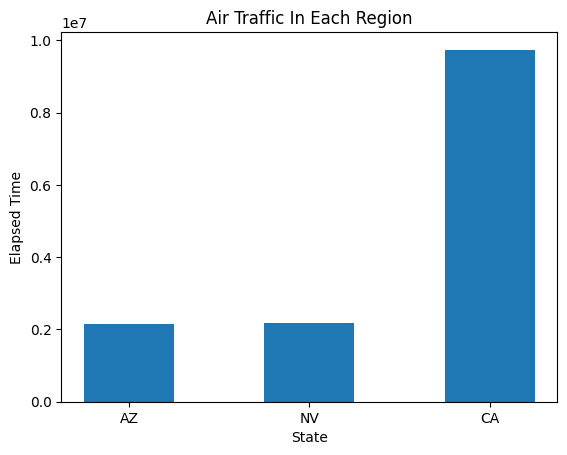

In [ ]:

# Filter the data for only data from the 3 states
filtered_flight_data = flight_data[flight_data['ORIGIN_ST'].isin(['AZ', 'NV', 'CA'])
]

# Getting the elapsed time for flights from each of the 3 states

az_time_data = filtered_flight_data[filtered_flight_data['ORIGIN_ST'] == 'AZ']['ELAPSED_TIME'].sum()
nv_time_data = filtered_flight_data[filtered_flight_data['ORIGIN_ST'] == 'NV']['ELAPSED_TIME'].sum()
ca_time_data = filtered_flight_data[filtered_flight_data['ORIGIN_ST'] == 'CA']['ELAPSED_TIME'].sum()

elapsedTime = [az_time_data, nv_time_data, ca_time_data]
originFL = ['AZ', 'NV', 'CA']

# create the bar chart for air traffic
plt.bar(originFL, elapsedTime, width = .5)
plt.title('Air Traffic In Each Region')
plt.xlabel('State')
plt.ylabel('Elapsed Time')
plt.show()



The bar chart "Air Traffic In Each Region" shows the elapsed time of air traffic across the three states: Arizona (AZ), Nevada (NV), and California (CA). Based on the chart displayed, California has significantly more air traffic than both Arizona and Nevada, as indicated by being the tallest bar on the chart, representing an elapsed time of over 1.2e8. This could indicate that California dominates air traffic in the region, as it handles the most total flight time by a huge margin. Arizona and Nevada has much lower air traffic compared to California, however, Arizona has slightly more air traffic than Nevada.



In this case, air traffic is measured by total flight time or elapsed time. This metric reflects the duration planes spend in the air. It captures how long aircrafts are present in the airspace, which is critical for air traffic management. A region with longer elapsed time would indicate more continuous use of its airspace by aircraft. Measuring air traffic based on flight frequency may overlook the fact that some regions handle more long flights where they spend extended periods in the air. Using elapsed time as a measure for air traffic provides a broader understanding of airspace usage as it accounts for both frequency of flights and the elapsed time, making it a good approach to determine which region has the most air traffic.

2. For each region i.e. the 3 states (AZ, NV, CA), analyze the most popular outbound/destination airports. For example, if a flight originated in CA (at any of its airports), where do they often go? Comment on your findings and visualize the results for the top 5 destinations.



<ipython-input-9-6ea61835cd6e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dest_data = filtered_flight_data.groupby(['DEST', 'ORIGIN_ST'], as_index=False)['FL_NUM'].count()


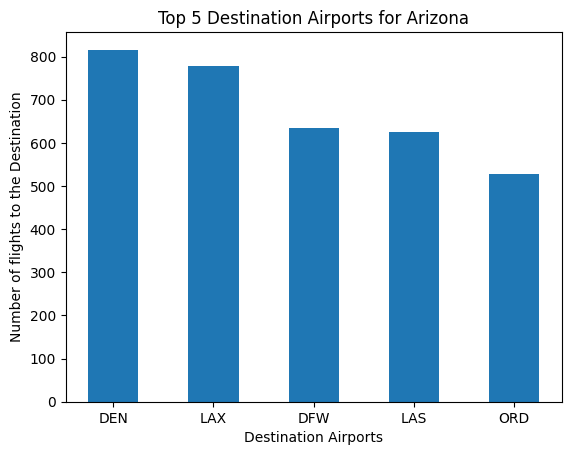

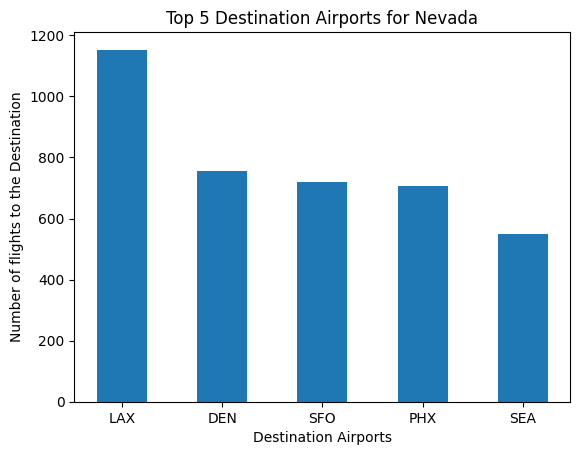

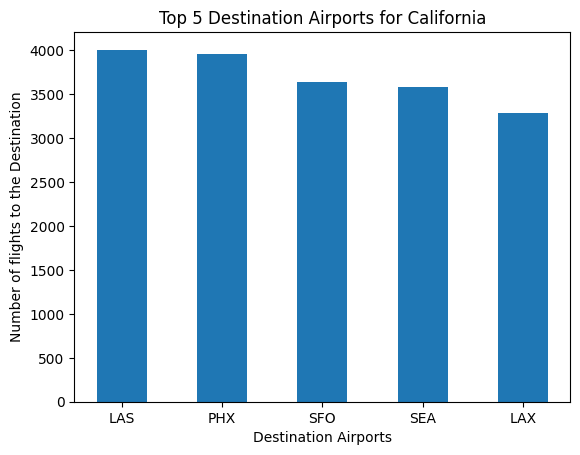

In [ ]:
# Grouping each destination and counting the frequency of the airport being a flight's destination
dest_data = filtered_flight_data.groupby(['DEST', 'ORIGIN_ST'], as_index=False)['FL_NUM'].count()

# Get the destinations where the origins are from the 3 states and sort the count in descending order
az_dest_data = dest_data[dest_data['ORIGIN_ST'] == 'AZ'].sort_values('FL_NUM', ascending = False)
nv_dest_data = dest_data[dest_data['ORIGIN_ST'] == 'NV'].sort_values('FL_NUM', ascending = False)
ca_dest_data = dest_data[dest_data['ORIGIN_ST'] == 'CA'].sort_values('FL_NUM', ascending = False)

# Get the top 5 most frequented airports
top_5_az = az_dest_data.head(5)
top_5_nv = nv_dest_data.head(5)
top_5_ca = ca_dest_data.head(5)

# make a bar chart for Arizona
plt.bar(top_5_az['DEST'], top_5_az['FL_NUM'], width = .5)
plt.title('Top 5 Destination Airports for Arizona')
plt.xlabel('Destination Airports')
plt.ylabel('Number of flights to the Destination')
plt.show()

# make a bar chart for Nevada
plt.bar(top_5_nv['DEST'], top_5_nv['FL_NUM'], width = .5)
plt.title('Top 5 Destination Airports for Nevada')
plt.xlabel('Destination Airports')
plt.ylabel('Number of flights to the Destination')
plt.show()

# make a bar chart for California
plt.bar(top_5_ca['DEST'], top_5_ca['FL_NUM'], width = .5)
plt.title('Top 5 Destination Airports for California')
plt.xlabel('Destination Airports')
plt.ylabel('Number of flights to the Destination')
plt.show()

For Arizona, Denver(DEN) and Los Angeles(LAX) are the two most frequent destinations, with Denver slightly higher. Along with those two, other popular destinations originating from Arizona include Dallas-Fort Worth (DFW), Seattle (SEA), and Las Vegas (LAS). Each of these airports receive significant flight traffic from Arizona.

For Nevada, Los Angeles (LAX) dominates over the other destinations with significantly more flights. The other top destinations include San Francisco (SFO), Denver (DEN), Phoenix (PHX), and Seattle (SEA).

For California, Phoenix (PHX) and Las Vegas (LAS) are the leading destinations from California. San Francisco (SFO), Seattle (SEA), and Los Angeles (LAX) also receive a large number of flights.

This indicates that the West Coast is heavily interconnected in terms of air traffic, with key cities like Los Angeles, Phoenix, and Denver serving as central hubs. It can also indicate influxes in tourism and economic centers like LAX and SFO that see substantial flight traffic.

3. For each region, calculate the proportion* of flights from each airline/operator. Visualize the top 10 results. Explain the results.
*Hint: Don't forget that proportion is an explicit requirement.

<ipython-input-10-5172454deb1f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_arizona_airline = arizona_flights.groupby(['CARRIER_CODE'], as_index = False)['FL_NUM'].count()


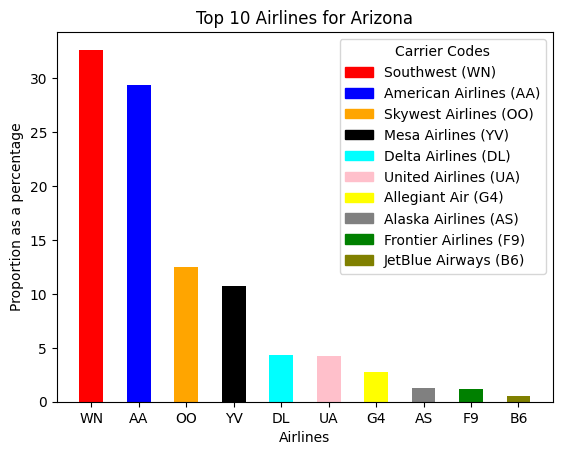

In [ ]:
# Extract the events that only occured in Arizona
arizona_flights = filtered_flight_data[filtered_flight_data['ORIGIN_ST'] == 'AZ']

# Group the data by airline and count the number of flights for each airline
filtered_arizona_airline = arizona_flights.groupby(['CARRIER_CODE'], as_index = False)['FL_NUM'].count()

# Get the sum of all arizona flights
filtered_arizona_sum = filtered_arizona_airline['FL_NUM'].sum()

# Calculate the proportion for each airline as percentage
filtered_arizona_airline['Proportion'] = ((filtered_arizona_airline['FL_NUM'] / filtered_arizona_sum) * 100).round(2)

# Sort the proportions in descending order
sorted_arizona_airline = filtered_arizona_airline.sort_values('Proportion', ascending = False)

# Get the top 10 proportion percentages
top_10_az = sorted_arizona_airline.head(10)


# Create carrier codes for legend
carrier_code = ['Southwest (WN)','American Airlines (AA)', 'Skywest Airlines (OO)',
            'Mesa Airlines (YV)', 'Delta Airlines (DL)', 'United Airlines (UA)'
            , 'Allegiant Air (G4)', 'Alaska Airlines (AS)',
            'Frontier Airlines (F9)', 'JetBlue Airways (B6)']

# Assign the colors to each airline
colors = ['red' if airline == 'WN'
          else 'blue' if airline == 'AA'
          else 'orange' if airline == 'OO'
          else 'black' if airline == 'YV'
          else 'cyan' if airline == 'DL'
          else 'pink' if airline == 'UA'
          else 'yellow' if airline == 'G4'
          else 'gray' if airline == 'AS'
          else 'green' if airline =='F9'
          else 'olive' if airline == 'B6'
          else 'purple'
          for airline in top_10_az['CARRIER_CODE']]

# Create the bar chart to visualize the top 10 for Arizona
plt.bar(top_10_az['CARRIER_CODE'], top_10_az['Proportion'], width = .5, color = colors)

# Create the handle for each airline
handles = [
    plt.Rectangle((0, 0), 1, 1, color='red'),    # Handle for Southwest
    plt.Rectangle((0, 0), 1, 1, color='blue'),    # Handle for American Airlines
    plt.Rectangle((0, 0), 1, 1, color='orange'),    # Handle for Skywest Airlines
    plt.Rectangle((0, 0), 1, 1, color='black'),    # Handle for Mesa Airlines
    plt.Rectangle((0, 0), 1, 1, color='cyan'),    # Handle for Delta Airlines
    plt.Rectangle((0, 0), 1, 1, color='pink'),    # Handle for United Airlines
    plt.Rectangle((0, 0), 1, 1, color='yellow'),    # Handle for Allegiant Air
    plt.Rectangle((0, 0), 1, 1, color='gray'),   # Handle for Alaska Airlines
    plt.Rectangle((0, 0), 1, 1, color='green'),    # Handle for Frontier Airlines
    plt.Rectangle((0, 0), 1, 1, color='olive')    # Handle for JetBlue Airways
]

# Create the legend
plt.legend(handles, carrier_code, title = 'Carrier Codes')

# Adjust the bar chart
plt.title('Top 10 Airlines for Arizona')
plt.xlabel('Airlines')
plt.ylabel('Proportion as a percentage')
plt.show()

According to this bar chart for the top 10 airline proportions, Southwest Airlines and American Airlines make up a huge chunk of the number of flights from Arizona. While the remaining airlines have much smaller proportions, which indicates that the two airlines are the most used for flights from Arizona.

<ipython-input-11-cb987357fe27>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_nevada_airline = nevada_flights.groupby(['CARRIER_CODE'], as_index = False)['FL_NUM'].count()


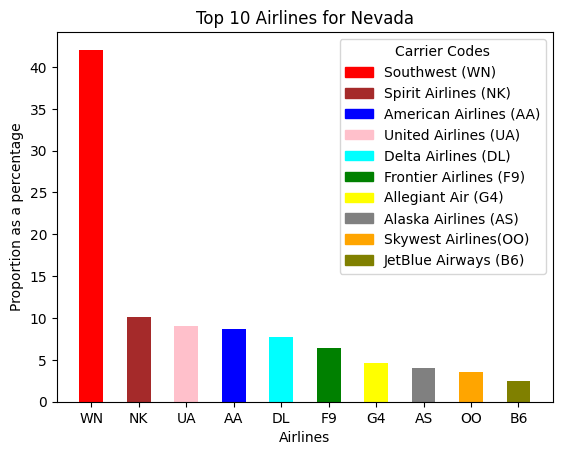

In [ ]:
# Extract the events that only occured in Nevada
nevada_flights = filtered_flight_data[filtered_flight_data['ORIGIN_ST'] == 'NV']

# Group the data by airline and count the number of flights for each airline
filtered_nevada_airline = nevada_flights.groupby(['CARRIER_CODE'], as_index = False)['FL_NUM'].count()

# Get the sum of all nevada flights
filtered_nevada_sum = filtered_nevada_airline['FL_NUM'].sum()

# Calculate the proportion for each airline as percentage
filtered_nevada_airline['Proportion'] = ((filtered_nevada_airline['FL_NUM'] / filtered_nevada_sum) * 100).round(2)

# Sort the proportions in descending order
sorted_nevada_airline = filtered_nevada_airline.sort_values('Proportion', ascending = False)

# Get the top 10 proportion percentages
top_10_nv = sorted_nevada_airline.head(10)

# Create carrier codes for legend
carrier_code = ['Southwest (WN)','Spirit Airlines (NK)', 'American Airlines (AA)',
                'United Airlines (UA)', 'Delta Airlines (DL)',
                'Frontier Airlines (F9)', 'Allegiant Air (G4)',
                'Alaska Airlines (AS)', 'Skywest Airlines(OO)',
                'JetBlue Airways (B6)']


# Assign the colors to each airline
colors = ['red' if airline == 'WN'
          else 'blue' if airline == 'AA'
          else 'orange' if airline == 'OO'
          else 'brown' if airline == 'NK'
          else 'cyan' if airline == 'DL'
          else 'pink' if airline == 'UA'
          else 'yellow' if airline == 'G4'
          else 'gray' if airline == 'AS'
          else 'green' if airline =='F9'
          else 'olive' if airline == 'B6'
          else 'purple'
          for airline in top_10_nv['CARRIER_CODE']]

# Create the bar chart to visualize the top 10 for Nevada
plt.bar(top_10_nv['CARRIER_CODE'], top_10_nv['Proportion'], width = .5, color = colors)

# Create the handle for each airline
handles = [
    plt.Rectangle((0, 0), 1, 1, color='red'),    # Handle for Southwest
    plt.Rectangle((0, 0), 1, 1, color='brown'),    # Handle for Spirit Airlines
    plt.Rectangle((0, 0), 1, 1, color='blue'),    # Handle for American Airlines
    plt.Rectangle((0, 0), 1, 1, color= 'pink'),    # Handle for United Airlines
    plt.Rectangle((0, 0), 1, 1, color='cyan'),    # Handle for Delta Airlines
    plt.Rectangle((0, 0), 1, 1, color='green'),    # Handle for Frontier airlines
    plt.Rectangle((0, 0), 1, 1, color='yellow'),    # Handle for Allegiant Air
    plt.Rectangle((0, 0), 1, 1, color='gray'),   # Handle for Alaska Airlines
    plt.Rectangle((0, 0), 1, 1, color='orange'),    # Handle for Skywest Airlines
    plt.Rectangle((0, 0), 1, 1, color='olive')    # Handle for JetBlue Airways
]

# Create the legend
plt.legend(handles, carrier_code, title = 'Carrier Codes')

# Adjust the bar chart
plt.title('Top 10 Airlines for Nevada')
plt.xlabel('Airlines')
plt.ylabel('Proportion as a percentage')
plt.show()


According to this bar chart, Southwest Airlines holds the biggest proportion in Nevada, being far ahead of any other airline. This indicates that the number of flights out of the total number of flights from Nevada is predominately flown by Southwest Airlines. The rest of the airlines have smaller and more evenly distributed number of flights, indicating that they all fly around similar numbers of flights from Nevada.

<ipython-input-12-f3d51c2ac9c7>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_cali_airline = cali_flights.groupby(['CARRIER_CODE'], as_index = False)['FL_NUM'].count()


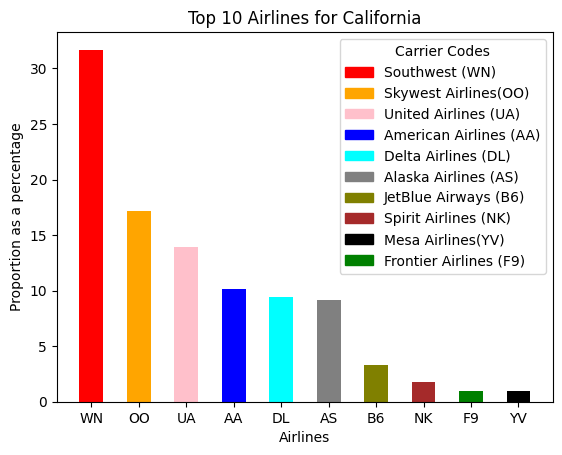

In [ ]:
# Extract the events that only occured in California
cali_flights = filtered_flight_data[filtered_flight_data['ORIGIN_ST'] == 'CA']

# Group the data by airline and count the number of flights for each airline
filtered_cali_airline = cali_flights.groupby(['CARRIER_CODE'], as_index = False)['FL_NUM'].count()

# Get the sum of all cali flights
filtered_cali_sum = filtered_cali_airline['FL_NUM'].sum()

# Calculate the proportion for each airline as percentage
filtered_cali_airline['Proportion'] = ((filtered_cali_airline['FL_NUM'] / filtered_cali_sum) * 100).round(2)

# Sort the proportions in descending order
sorted_cali_airline = filtered_cali_airline.sort_values('Proportion', ascending = False)

# Get the top 10 proportion percentages
top_10_ca = sorted_cali_airline.head(10)

# Create carrier codes for legend
carrier_code = ['Southwest (WN)', 'Skywest Airlines(OO)',
                'United Airlines (UA)', 'American Airlines (AA)',
                'Delta Airlines (DL)',  'Alaska Airlines (AS)',
                'JetBlue Airways (B6)', 'Spirit Airlines (NK)',
                'Mesa Airlines(YV)', 'Frontier Airlines (F9)'
                ]

# Assign the colors to each airline
colors = ['red' if airline == 'WN'
          else 'blue' if airline == 'AA'
          else 'orange' if airline == 'OO'
          else 'brown' if airline == 'NK'
          else 'cyan' if airline == 'DL'
          else 'pink' if airline == 'UA'
          else 'black' if airline == 'YV'
          else 'gray' if airline == 'AS'
          else 'green' if airline =='F9'
          else 'olive' if airline == 'B6'
          else 'purple'
          for airline in top_10_ca['CARRIER_CODE']]

# Create the bar chart to visualize the top 10 for Nevada
plt.bar(top_10_ca['CARRIER_CODE'], top_10_ca['Proportion'], width = .5, color = colors)

# Create the handle for each airline
handles = [
    plt.Rectangle((0, 0), 1, 1, color='red'),    # Handle for Southwest
    plt.Rectangle((0, 0), 1, 1, color='orange'),    # Handle for Skywest Airlines
    plt.Rectangle((0, 0), 1, 1, color='pink'),    # Handle for United Airlines
    plt.Rectangle((0, 0), 1, 1, color= 'blue'),    # Handle for American Airlines
    plt.Rectangle((0, 0), 1, 1, color='cyan'),    # Handle for Delta Airlines
    plt.Rectangle((0, 0), 1, 1, color='gray'),    # Handle for Alaska Airlines
    plt.Rectangle((0, 0), 1, 1, color='olive'),    # Handle for Jetblue Airways
    plt.Rectangle((0, 0), 1, 1, color='brown'),   # Handle for Spirit Airlines
    plt.Rectangle((0, 0), 1, 1, color='black'),    # Handle for Mesa Airlines
    plt.Rectangle((0, 0), 1, 1, color='green')    # Handle for Frontier Airlines
]

# Create the legend
plt.legend(handles, carrier_code, title = 'Carrier Codes')

# Adjust the bar chart
plt.title('Top 10 Airlines for California')
plt.xlabel('Airlines')
plt.ylabel('Proportion as a percentage')
plt.show()


According to this bar chart, Southwest has the biggest proportion of number of flights, with just over 30% of the total flihts. This suggests that Southwest Airlines is the dominant airline in California, handling almost a third of the state's air traffic. Skywest follows Southwest with approximately 18%, contributing significantlt to the number of flights in California. Similarly United, American, Delta, and Alaska make up the midrange of the proportion where they hold a decent proportion, indicating they are part of the major carriers within California. While airlines like Spirit, Mesa, and Frontier have a presence but are barely used.

Overall, throughout the 3 regions, Southwest has the biggest proportion of flights out of the total number of flights from each region. This indicates that it is the biggest airline used in the West and is a major carrier that may not only be in the West but throughout the U.S. Southwest may be the go-to airline for domestic travelers in many parts of the country, especially the West, possibly due to affordability, frequent flights, etc.

## Question 4 — (20 points)

1. Explore the carriers within the dataset and demonstrate at least TWO (2) patterns that you identified.
2. Analyze the minimum, maximum and average arrival and departure delays for each Airline/Carrier. Visualize the top 10 results. Explain the patterns in the delays and demonstrate: 1) which carriers are more prone to flight delays and 2) are the delays occurring more frequently in certain regions**?
**Tip: it is important to analyze the airlines across multiple airports and/or regions in order to conclude that they have a pattern of being late.

<ipython-input-34-3616f15b1a6d>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popular_carrier_origins = flight_data.groupby(['CARRIER_CODE', 'ORIGIN'], as_index=False)['ORIGIN'].count()
<ipython-input-34-3616f15b1a6d>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popular_dep_times = flight_data.groupby(['CARRIER_CODE'], as_index=False)['ARR_TIME'].mean()
<ipython-input-34-3616f15b1a6d>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and sil

     CARRIER_CODE ORIGIN
1959           YX    YUM
1863           YX    FSD
1869           YX    GRR
1868           YX    GRI
1867           YX    GJT
...           ...    ...
100            AA    PIA
101            AA    PIT
102            AA    PRC
103            AA    PSC
0              AA    ABQ

[1960 rows x 2 columns]
   CARRIER_CODE                  ARR_TIME
0            AA 1 days 02:01:07.412614915
1            AS 1 days 02:11:25.761302309
2            B6 1 days 03:05:29.511724137
3            DL 1 days 02:15:47.931155110
4            F9 1 days 02:16:41.191222570
5            G4 1 days 02:30:56.201582673
6            HA 1 days 02:29:02.569269521
7            MQ 0 days 23:57:18.510638297
8            NK 1 days 01:58:06.713062098
9            OO 1 days 00:47:29.453663793
10           UA 1 days 02:22:18.166354822
11           WN 1 days 01:29:03.068846975
12           YV 1 days 01:20:20.762463343
13           YX           0 days 21:26:40
   CARRIER_CODE                  DEP_TIME
0  

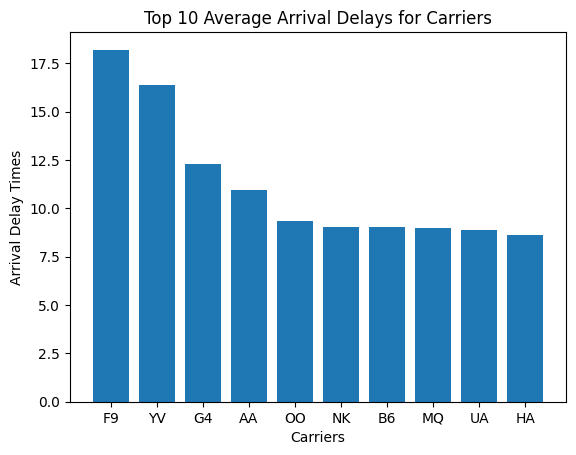

<ipython-input-34-3616f15b1a6d>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  min_arr_delay = flight_data.groupby(['CARRIER_CODE'], as_index=False)['ARR_DELAY'].min()


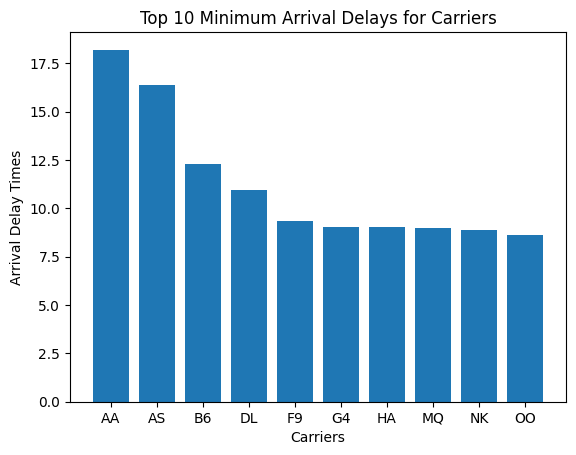

<ipython-input-34-3616f15b1a6d>:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_arr_delay = flight_data.groupby(['CARRIER_CODE'], as_index=False)['ARR_DELAY'].max()


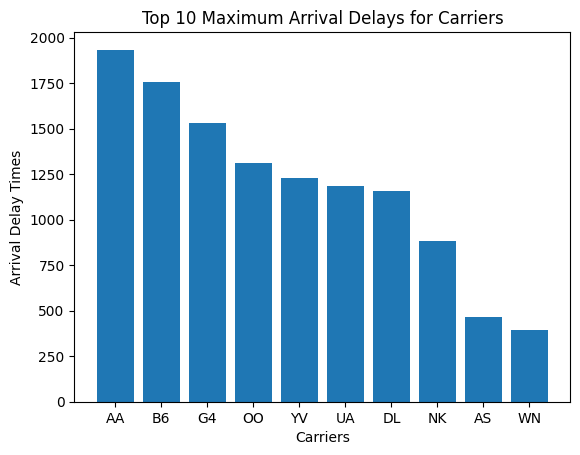

<ipython-input-34-3616f15b1a6d>:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_dep_delay = flight_data.groupby(['CARRIER_CODE'], as_index=False)['DEP_DELAY'].mean()


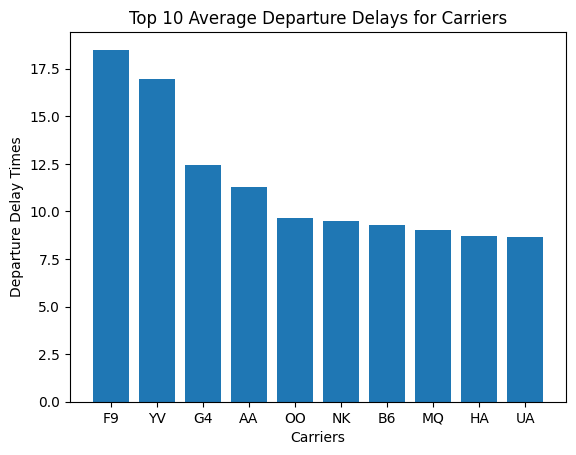

<ipython-input-34-3616f15b1a6d>:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  min_dep_delay = flight_data.groupby(['CARRIER_CODE'], as_index=False)['DEP_DELAY'].min()


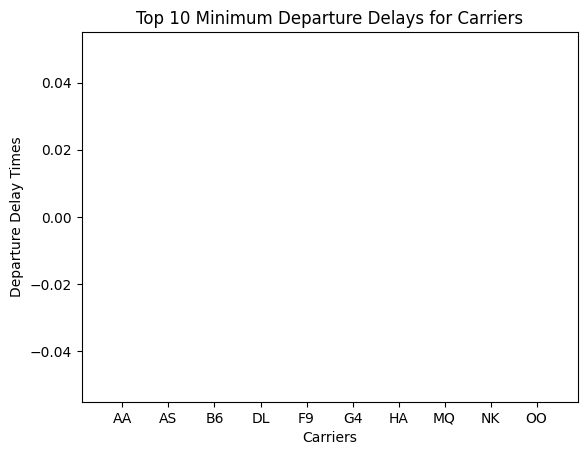

<ipython-input-34-3616f15b1a6d>:69: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_dep_delay = flight_data.groupby(['CARRIER_CODE'], as_index=False)['DEP_DELAY'].max()


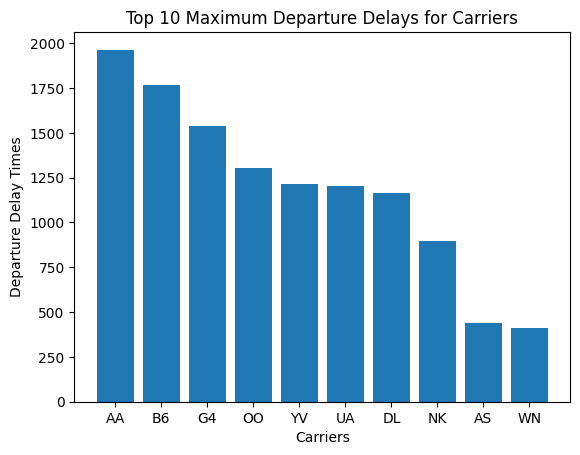

   CARRIER_CODE  DEP_DELAY
4            F9  20.126629
12           YV  15.843697
7            MQ  13.207143
0            AA  11.240411
9            OO  10.080249
5            G4   9.863971
8            NK   8.369295
10           UA   7.806540
3            DL   7.720674
2            B6   7.561069
6            HA   7.323251
1            AS   7.319801
11           WN   6.373832
13           YX        NaN
   CARRIER_CODE  ARR_DELAY
4            F9  18.903166
12           YV  14.697479
0            AA  10.172768
5            G4   9.481618
7            MQ   9.421429
9            OO   9.236053
1            AS   8.373932
8            NK   7.685685
3            DL   6.883431
10           UA   6.812508
2            B6   6.517176
6            HA   5.570888
11           WN   4.741336
13           YX        NaN
   CARRIER_CODE  DEP_DELAY
8            NK  36.107143
12           YV  17.153392
2            B6  17.000000
5            G4  13.865604
4            F9  12.020942
6            HA  10.310345
0

<ipython-input-34-3616f15b1a6d>:80: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay_cali = CA_flights.groupby(['CARRIER_CODE'], as_index=False)['DEP_DELAY'].mean()
<ipython-input-34-3616f15b1a6d>:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay_cali_arr = CA_flights.groupby(['CARRIER_CODE'], as_index=False)['ARR_DELAY'].mean()
<ipython-input-34-3616f15b1a6d>:88: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warni

In [ ]:
# 4.1

# finding the most popular airports of origin
popular_carrier_origins = flight_data.groupby(['CARRIER_CODE', 'ORIGIN'], as_index=False)['ORIGIN'].count()
sorted_top = popular_carrier_origins.sort_values(by=['CARRIER_CODE'], ascending=False)
print(sorted_top)

#finding the most popular arrival and departure times across airlines
popular_dep_times = flight_data.groupby(['CARRIER_CODE'], as_index=False)['ARR_TIME'].mean()
print(popular_dep_times)
popular_arr_times = flight_data.groupby(['CARRIER_CODE'], as_index=False)['DEP_TIME'].mean()
print(popular_arr_times)

# 4.2

# carriers and their average arrival delays
avg_arr_delay = flight_data.groupby(['CARRIER_CODE'], as_index=False)['ARR_DELAY'].mean()
sorted_avg = avg_arr_delay.sort_values(by=['ARR_DELAY'], ascending=False)
top_10_avg_arr = sorted_avg.head(10)
plt.bar(top_10_avg_arr['CARRIER_CODE'], top_10_avg_arr['ARR_DELAY'])
plt.title('Top 10 Average Arrival Delays for Carriers')
plt.xlabel('Carriers')
plt.ylabel('Arrival Delay Times')
plt.show()

# carriers and their minimum arrival delays
min_arr_delay = flight_data.groupby(['CARRIER_CODE'], as_index=False)['ARR_DELAY'].min()
sorted_min = min_arr_delay.sort_values(by=['ARR_DELAY'], ascending=False)
top_10_min_arr = sorted_min.head(10)
plt.bar(top_10_min_arr['CARRIER_CODE'], top_10_avg_arr['ARR_DELAY'])
plt.title('Top 10 Minimum Arrival Delays for Carriers')
plt.xlabel('Carriers')
plt.ylabel('Arrival Delay Times')
plt.show()


# carriers and their maximum arrival delays
max_arr_delay = flight_data.groupby(['CARRIER_CODE'], as_index=False)['ARR_DELAY'].max()
sorted_max = max_arr_delay.sort_values(by=['ARR_DELAY'], ascending=False)
top_10_max_arr = sorted_max.head(10)
plt.bar(top_10_max_arr['CARRIER_CODE'], top_10_max_arr['ARR_DELAY'])
plt.title('Top 10 Maximum Arrival Delays for Carriers')
plt.xlabel('Carriers')
plt.ylabel('Arrival Delay Times')
plt.show()

# visualizing carriers and their average departure delays
avg_dep_delay = flight_data.groupby(['CARRIER_CODE'], as_index=False)['DEP_DELAY'].mean()
sorted_avg_dep = avg_dep_delay.sort_values(by=['DEP_DELAY'], ascending=False)
top_10_avg_dep = sorted_avg_dep.head(10)
plt.bar(top_10_avg_dep['CARRIER_CODE'], top_10_avg_dep['DEP_DELAY'])
plt.title('Top 10 Average Departure Delays for Carriers')
plt.xlabel('Carriers')
plt.ylabel('Departure Delay Times')
plt.show()


# visualizing carriers and their minimum departure delays
min_dep_delay = flight_data.groupby(['CARRIER_CODE'], as_index=False)['DEP_DELAY'].min()
sorted_min_dep = min_dep_delay.sort_values(by=['DEP_DELAY'], ascending=False)
top_10_min_dep = sorted_min_dep.head(10)
plt.bar(top_10_min_dep['CARRIER_CODE'], top_10_min_dep['DEP_DELAY'])
plt.title('Top 10 Minimum Departure Delays for Carriers')
plt.xlabel('Carriers')
plt.ylabel('Departure Delay Times')
plt.show()

# visualizing carriers and their maximum departure delays
max_dep_delay = flight_data.groupby(['CARRIER_CODE'], as_index=False)['DEP_DELAY'].max()
sorted_max_dep = max_dep_delay.sort_values(by=['DEP_DELAY'], ascending=False)
top_10_max_dep = sorted_max_dep.head(10)
plt.bar(top_10_max_dep['CARRIER_CODE'], top_10_max_dep['DEP_DELAY'])
plt.title('Top 10 Maximum Departure Delays for Carriers')
plt.xlabel('Carriers')
plt.ylabel('Departure Delay Times')
plt.show()

# analyzing flight delays in different regions
CA_flights = flight_data[flight_data['ORIGIN_ST'] == 'CA']
avg_delay_cali = CA_flights.groupby(['CARRIER_CODE'], as_index=False)['DEP_DELAY'].mean()
top_cali_delay = avg_delay_cali.sort_values(by=['DEP_DELAY'], ascending=False)
avg_delay_cali_arr = CA_flights.groupby(['CARRIER_CODE'], as_index=False)['ARR_DELAY'].mean()
top_cali_delay_arr = avg_delay_cali_arr.sort_values(by=['ARR_DELAY'], ascending=False)
print(top_cali_delay)
print(top_cali_delay_arr)

AZ_flights = flight_data[flight_data['ORIGIN_ST'] == 'AZ']
avg_delay_az = AZ_flights.groupby(['CARRIER_CODE'], as_index=False)['DEP_DELAY'].mean()
top_az_delay = avg_delay_az.sort_values(by=['DEP_DELAY'], ascending=False)
avg_delay_az_arr = AZ_flights.groupby(['CARRIER_CODE'], as_index=False)['ARR_DELAY'].mean()
top_az_delay_arr = avg_delay_az_arr.sort_values(by=['ARR_DELAY'], ascending=False)
print(top_az_delay)
print(top_az_delay_arr)

NV_flights = flight_data[flight_data['ORIGIN_ST'] == 'NV']
avg_delay_nv = NV_flights.groupby(['CARRIER_CODE'], as_index=False)['DEP_DELAY'].mean()
top_nv_delay = avg_delay_nv.sort_values(by=['DEP_DELAY'], ascending=False)
avg_delay_nv_arr = NV_flights.groupby(['CARRIER_CODE'], as_index=False)['ARR_DELAY'].mean()
top_nv_delay_arr = avg_delay_nv_arr.sort_values(by=['ARR_DELAY'], ascending=False)
print(top_nv_delay)
print(top_nv_delay_arr)


## 4.1 Patterns I Found:

From the exploration above where I chose to look at carrier's average arrival delays and departure delays, I can deduce the following two patterns. Please see the first three printed items for where I got this information:

1. Across airlines, the most popular arrivals were in the time range of ~1300 - ~ 1500 and most popular departure times were around ~1000 - ~1400

2. Republic Airlines (YX) has the most flights out of all the airports present in this dataset (tends to have flight amounts in the 2000s from each airport) whereas American Airlines (AA) has the least (tends to have flight amounts in the 0-100 range from each airport)

## 4.2 Explanation

When examining data that considered ALL 3 states AZ, CA and NV, F9, AA, YV and B6 were commonly in the top 5 spots of flights most prone to both arrival and departure delays.

In terms of specific regions, we see that for flights leaving AND arriving to CA, F9 had the highest average delay time. MQ was in 2nd for departure delay and OO in 2nd for arrival delay. B6 was third for both. However for Arizona, F9's average delay time for both departure and arriving flights dropped to 8th and 9th in ranking leaving B9 and YX in 1st and 2nd place for highest average departure delay time and YX and B9 in 1st and 2nd (they swapped) for arrival delay time. For Nevada flights F9 and B6 also shared 1st and 2nd place for highest departure and arrival delay time.


# Question 5 — (30 points)

Evaluate which airlines have the best performance in the region. Display the top 10 airlines.
Note: it's important to explain your rational for determining "the best performance".
For each airline, ensure that you calculate their total flight hours for each month. Explain and visualize the results for the top 10 airlines.
Hint: the total flight hours is not equivalent to the frequency of flights, and ensure that you display the total hours and not the total minutes.

<ipython-input-14-e9d83b37b5a1>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_total_delay = flight_data.groupby('CARRIER_CODE', as_index=False)[['ARR_DELAY', 'DEP_DELAY']].mean()


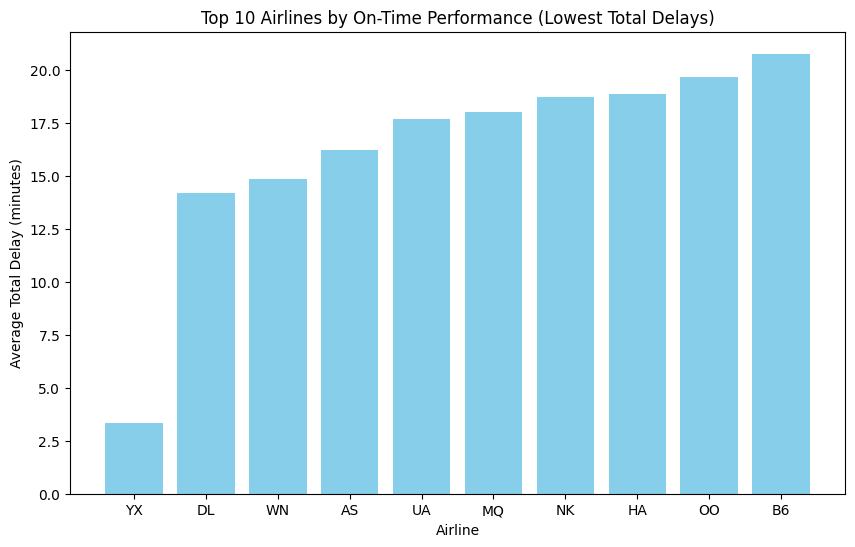

In [ ]:
5.1
# Calculate the mean total delay for each airline using ARR_DELAY and DEP_DELAY
avg_total_delay = flight_data.groupby('CARRIER_CODE', as_index=False)[['ARR_DELAY', 'DEP_DELAY']].mean()

# Add a new column for the total delay as the sum of ARR_DELAY and DEP_DELAY
avg_total_delay['total_delay'] = avg_total_delay['ARR_DELAY'] + avg_total_delay['DEP_DELAY']

# Sort airlines by least average total delay (best OTP)
sorted_avg_total_delay = avg_total_delay.sort_values(by='total_delay', ascending=True)

# Get the top 10 airlines with the least total delays (best OTP)
top_10_total_delay = sorted_avg_total_delay.head(10)

# Plot the top 10 airlines with the least total delays
plt.figure(figsize=(10, 6))
plt.bar(top_10_total_delay['CARRIER_CODE'], top_10_total_delay['total_delay'], color='skyblue')
plt.title('Top 10 Airlines by On-Time Performance (Lowest Total Delays)')
plt.xlabel('Airline')
plt.ylabel('Average Total Delay (minutes)')
plt.show()


5.1
We defined the best performance of airlines based on on-time performance (OTP), specifically measuring their ability to minimize delays in both arrival and departure. We focused on the average total delay, which combines both types of delays, as a key indicator of reliability. This metric is crucial because it directly affects customer satisfaction, operational efficiency, and cost management, providing a comprehensive view of how well each airline meets its scheduling commitments. By identifying the airlines with the lowest average total delays, we highlighted those that excel in delivering timely service to their passengers.


<ipython-input-15-eecc69c00f6f>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_arr_delay = flight_data.groupby('CARRIER_CODE')['ARR_DELAY'].mean()
<ipython-input-15-eecc69c00f6f>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_dep_delay = flight_data.groupby('CARRIER_CODE')['DEP_DELAY'].mean()
<ipython-input-15-eecc69c00f6f>:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_flight_hours = flight_data

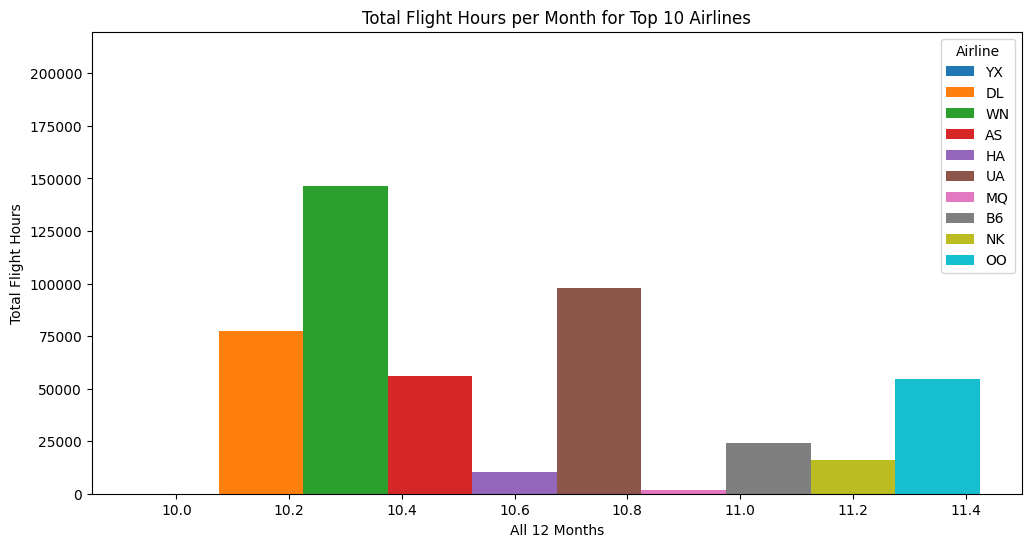

In [ ]:
5.2
# Convert FL_DATE is in datetime format
flight_data['FL_DATE'] = pd.to_datetime(flight_data['FL_DATE'])

# Get month from FL_DATE
flight_data['MONTH'] = flight_data['FL_DATE'].dt.month

# Convert both DEP_TIME and ARR_TIME to a time format as well
flight_data['DEP_TIME'] = pd.to_timedelta(flight_data['DEP_TIME'], unit='m')
flight_data['ARR_TIME'] = pd.to_timedelta(flight_data['ARR_TIME'], unit='m')

# Calculate the total flight hours
flight_data['FLIGHT_HOURS'] = (flight_data['ARR_TIME'] - flight_data['DEP_TIME']).dt.total_seconds() / 3600

flight_data = flight_data[flight_data['FLIGHT_HOURS'] > 0]

# Average arrival and departure delays
avg_arr_delay = flight_data.groupby('CARRIER_CODE')['ARR_DELAY'].mean()
avg_dep_delay = flight_data.groupby('CARRIER_CODE')['DEP_DELAY'].mean()

# Create a DataFrame to combine these delays: Arrival, and departures
avg_total_delay = pd.DataFrame({
    'CARRIER_CODE': avg_arr_delay.index,
    'AVG_ARR_DELAY': avg_arr_delay.values,
    'AVG_DEP_DELAY': avg_dep_delay.values
})

# Calculate total delay for each airline
avg_total_delay['total_delay'] = avg_total_delay['AVG_ARR_DELAY'] + avg_total_delay['AVG_DEP_DELAY']

# Sort each airlines by least total delay (best OTP)
best_performance_delay = avg_total_delay.sort_values(by='total_delay').head(10)

# Extract top 10 airlines
top_10_airlines = best_performance_delay['CARRIER_CODE']

# Calculate the total flight hours for each airline per month
monthly_flight_hours = flight_data.groupby(['CARRIER_CODE', 'MONTH'], as_index=False)['FLIGHT_HOURS'].sum()

# Filter the monthly_flight_hours for the top 10 airlines
top_10_monthly_flight_hours = monthly_flight_hours[monthly_flight_hours['CARRIER_CODE'].isin(top_10_airlines)]


# Create the figure for the plot
plt.figure(figsize=(12, 6))

# Plot total flight hours for each airline for each single month
# define bar width
bar_width = 0.15

for i, airline in enumerate(top_10_airlines):
    airline_data = top_10_monthly_flight_hours[top_10_monthly_flight_hours['CARRIER_CODE'] == airline]
    plt.bar(airline_data['MONTH'] + i * bar_width, airline_data['FLIGHT_HOURS'], width=bar_width, label=airline)

plt.title('Total Flight Hours per Month for Top 10 Airlines')
plt.xlabel('All 12 Months')
plt.ylabel('Total Flight Hours')
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
               5: 'May', 6: 'June', 7: 'July', 8: 'August',
               9: 'September', 10: 'October', 11: 'November', 12: 'December'}
plt.legend(title='Airline')
plt.ylim(0, top_10_monthly_flight_hours['FLIGHT_HOURS'].max() * 1.5)
plt.show()

5.2 Explanation:
In the second part of question 5,
we calculated the total flight hours for the top 10 airlines on a monthly basis. The results showed that airlines such as Southwest Airlines, American Airlines, and Delta Airlines for example consistently had the highest total flight hours throughout the year, with peaks during certain months like July and December, most likely reflecting increased travel demand since those are peak vacations especially for students as an example. The analysis also revealed that smaller airlines contributed significantly less to total flight hours but remained consistent in their operations. These findings highlight seasonal trends in air travel and provide insights into the operational scale of the top-performing airlines.

# Question 6 — (20 points)

Select any THREE (3) aircraft***, and explore the data to analyze the following for each aircraft:

Indicate which airline operates the selected aircraft and where it often travels.
Arrival and departure delays at the airports where it traveled.
Create summary statistics on the distance traveled.
Analyze all the results in 6.1-6.3 to identify any patterns that are evident. Explain your findings and visualize ALL results.
***Note: the TAIL_NUM can help you to identify each unique aircraft.


In [ ]:
import random

# Get unique aircraft tail numbers
unique_aircraft = flight_data['TAIL_NUM'].unique()

# Randomly select 3 aircraft
random_3_aircraft = random.sample(list(unique_aircraft), 3)

print("3 randomly selected aircraft:")
for aircraft in random_3_aircraft:
    print(aircraft)

3 randomly selected aircraft:
N589AS
N77520
N8520Q


In [ ]:
# Question 6.1 for aircraft TAIL_NUM = N589AS

# Determines what airline the aircraft operates on and its top 5 most frequent routes
aircraft_1 = flight_data[flight_data['TAIL_NUM'] == 'N589AS']
print(f"Airline operating N589AS: {aircraft_1['CARRIER_CODE'].mode()[0]}")
print("\nTop 5 most frequent routes:")
print(aircraft_1.groupby(['ORIGIN', 'DEST'], observed=True).size().sort_values(ascending=False).head())

Airline operating N589AS: AS

Top 5 most frequent routes:
ORIGIN  DEST
SJC     PDX     3
OGG     OAK     2
PDX     SJC     2
SBA     SEA     2
SEA     SBA     2
dtype: int64


**Findings:** The aircraft N589AS is operated by Alaska Airlines. The top 5 most frequent routes are (in order): San Jose to Portland, Kahului to Oakland, Portland to San Jose, Santa Barbara to Seattle, and Seattle to Santa Barbara.

Average Delays at Airports:
     DEP_DELAY  ARR_DELAY  TOTAL_DELAY
PHX      29.50      24.50        54.00
EWR      16.00      28.00        44.00
KOA      19.50      17.00        36.50
SBA      15.25      13.75        29.00
SAN       5.85      10.65        16.50
SEA       7.65       7.65        15.30
SJC       6.20       8.70        14.90
PDX       5.90       5.80        11.70
LIH       0.00       8.00         8.00
OGG       2.90       4.40         7.30
HNL       0.00       2.50         2.50
ORD       2.00       0.00         2.00
SMF       0.00       1.50         1.50
SFO       0.25       1.00         1.25
OAK       0.00       0.50         0.50
AUS       0.00       0.00         0.00
RDU       0.00       0.00         0.00
LAX       0.00       0.00         0.00
SNA       0.00       0.00         0.00


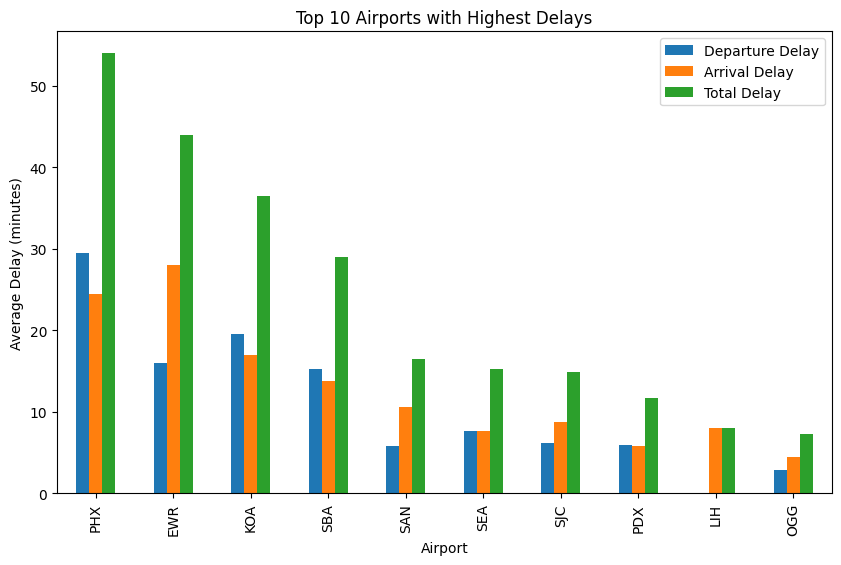

In [ ]:
# Question 6.2 for aircraft TAIL_NUM = N589AS

# Calculates average delays for each airport
origin_delays = aircraft_1.groupby('ORIGIN', observed=True).agg({
    'DEP_DELAY': 'mean',
    'ARR_DELAY': 'mean'
}).round(1)

dest_delays = aircraft_1.groupby('DEST', observed=True).agg({
    'DEP_DELAY': 'mean',
    'ARR_DELAY': 'mean'
}).round(1)

# Combine origin and destination delays
all_delays = pd.concat([origin_delays, dest_delays]).groupby(level=0).mean()

# Sort by total delay (departure + arrival)
all_delays['TOTAL_DELAY'] = all_delays['DEP_DELAY'] + all_delays['ARR_DELAY']
all_delays_sorted = all_delays.sort_values('TOTAL_DELAY', ascending=False)

print("Average Delays at Airports:")
print(all_delays_sorted)

ax = all_delays_sorted.head(10).plot(kind='bar', figsize=(10, 6))
ax.set_title('Top 10 Airports with Highest Delays')
ax.set_xlabel('Airport')
ax.set_ylabel('Average Delay (minutes)')
ax.legend(['Departure Delay', 'Arrival Delay', 'Total Delay'])

**Findings:** The top three airports with the highest average delay times are PHX, EWR, and KOA (Phoenix Sky Harbor International Airport, Newark Liberty International Airport, and Kona International Airport). PHX is in first with an average delay time of over 50 minutes, EWR in second with an average delay time of about 45 minutes, and KOA in third with an average delay time of about 35 minutes. The airport with the lowest average delay time is OGG (Kahului Airport), with an average delay time of under 10 minutes.

Summary Statistics of Distance Traveled:
count      44.000000
mean     1667.363636
std       853.327525
min       550.000000
25%       852.750000
50%      2092.000000
75%      2454.750000
max      2676.000000
Name: DISTANCE, dtype: float64

Total Distance Traveled: 73,364.00 miles
Number of Flights: 44
Average Distance per Flight: 1667.36 miles

Longest Flight:
From SAN to LIH: 2676 miles

Shortest Flight:
From SFO to PDX: 550 miles


Text(0, 0.5, 'Frequency')

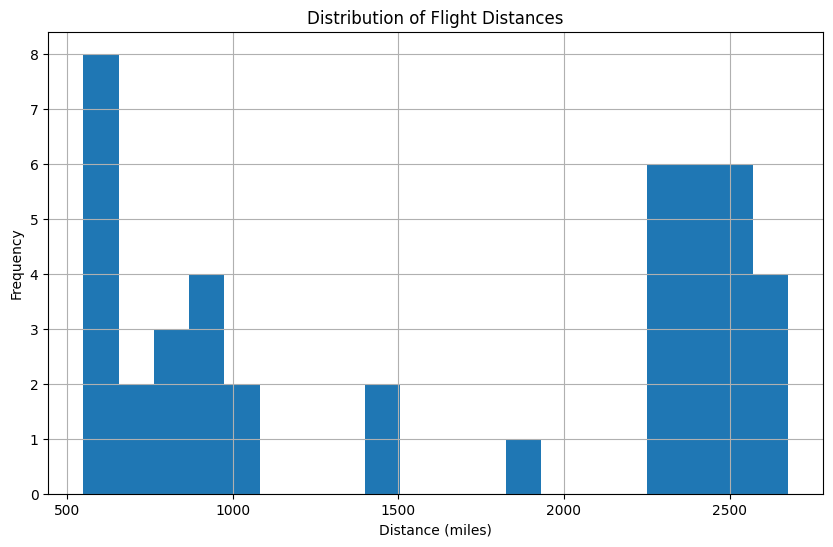

In [ ]:
# Question 6.3 for aircraft TAIL_NUM = N589AS

# Calculate basic summary statistics
distance_stats = aircraft_1['DISTANCE'].describe()

print("Summary Statistics of Distance Traveled:")
print(distance_stats)

# Calculate additional statistics
total_distance = aircraft_1['DISTANCE'].sum()
num_flights = len(aircraft_1)
avg_distance_per_flight = total_distance / num_flights

print(f"\nTotal Distance Traveled: {total_distance:,.2f} miles")
print(f"Number of Flights: {num_flights}")
print(f"Average Distance per Flight: {avg_distance_per_flight:.2f} miles")

# Find the longest and shortest flights
longest_flight = aircraft_1.loc[aircraft_1['DISTANCE'].idxmax()]
shortest_flight = aircraft_1.loc[aircraft_1['DISTANCE'].idxmin()]

print("\nLongest Flight:")
print(f"From {longest_flight['ORIGIN']} to {longest_flight['DEST']}: {longest_flight['DISTANCE']} miles")

print("\nShortest Flight:")
print(f"From {shortest_flight['ORIGIN']} to {shortest_flight['DEST']}: {shortest_flight['DISTANCE']} miles")

# Visualize distance distribution
ax = aircraft_1['DISTANCE'].hist(bins=20, figsize=(10, 6))
ax.set_title('Distribution of Flight Distances')
ax.set_xlabel('Distance (miles)')
ax.set_ylabel('Frequency')

**Findings:** For aircraft N589AS, the most frequent travel distance is about 600-700 miles, with a frequency of 8. The second most traveled distance is from 2300-2600 miles, with a frequency of 6. The third most traveled distance is tied with a frequency of 4, at a distance of 800-950 miles and 2600-2700 miles. Between 1100-1400 miles, 1500-1800 miles, 1900-2300 miles, and over 2700 miles, there is a frequency travel rate of 0.

In [ ]:
# Question 6.1 for aircraft TAIL_NUM = N77520

# Determines what airline the aircraft operates on and its top 5 most frequent routes
aircraft_2 = flight_data[flight_data['TAIL_NUM'] == 'N77520']
print(f"Airline operating N77520: {aircraft_2['CARRIER_CODE'].mode()[0]}")
print("\nTop 5 most frequent routes:")
print(aircraft_2.groupby(['ORIGIN', 'DEST'], observed=True).size().sort_values(ascending=False).head())

Airline operating N77520: UA

Top 5 most frequent routes:
ORIGIN  DEST
PDX     SFO     3
SFO     OGG     2
BUR     SFO     2
SFO     AUS     2
        BUR     2
dtype: int64


**Findings:** Aircraft N77520 is operated by United Airlines. The 5 most frequent routes are (in order): Portland to San Francisco, San Francisco to Kahului, Hollywood to San Francisco, and San Francisco to Austin.

Average Delays at Airports:
     DEP_DELAY  ARR_DELAY  TOTAL_DELAY
CVG     180.50     167.50       348.00
SFO      11.75      10.35        22.10
OGG      11.50       0.00        11.50
SNA       7.50       3.50        11.00
PHL       0.00       8.50         8.50
DCA       3.50       0.00         3.50
PDX       0.00       3.50         3.50
DEN       0.50       2.35         2.85
LAX       0.90       1.95         2.85
LAS       0.00       1.35         1.35
BUR       1.00       0.00         1.00
ORD       0.00       0.00         0.00
SAN       0.00       0.00         0.00
AUS       0.00       0.00         0.00
ONT       0.00       0.00         0.00
MFR       0.00       0.00         0.00
IND       0.00       0.00         0.00
IAD       0.00       0.00         0.00
HNL       0.00       0.00         0.00
LIH       0.00       0.00         0.00


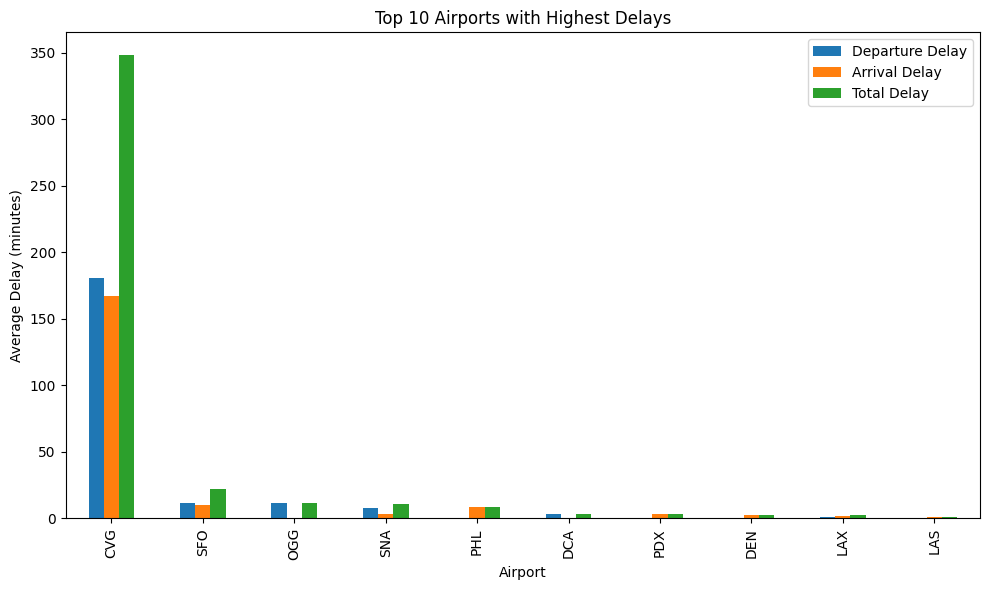

In [ ]:
# Question 6.2 for aircraft TAIL_NUM = N77520

# Calculates average delays for each airport
origin_delays = aircraft_2.groupby('ORIGIN', observed=True).agg({
    'DEP_DELAY': 'mean',
    'ARR_DELAY': 'mean'
}).round(1)

dest_delays = aircraft_2.groupby('DEST', observed=True).agg({
    'DEP_DELAY': 'mean',
    'ARR_DELAY': 'mean'
}).round(1)

# Combine origin and destination delays
all_delays = pd.concat([origin_delays, dest_delays]).groupby(level=0).mean()

# Sort by total delay (departure + arrival)
all_delays['TOTAL_DELAY'] = all_delays['DEP_DELAY'] + all_delays['ARR_DELAY']
all_delays_sorted = all_delays.sort_values('TOTAL_DELAY', ascending=False)

print("Average Delays at Airports:")
print(all_delays_sorted)

ax = all_delays_sorted.head(10).plot(kind='bar', figsize=(10, 6))
ax.set_title('Top 10 Airports with Highest Delays')
ax.set_xlabel('Airport')
ax.set_ylabel('Average Delay (minutes)')
ax.legend(['Departure Delay', 'Arrival Delay', 'Total Delay'])
ax.figure.tight_layout()

**Findings:** The airport with the highest delay time is CVG, otherwise known as
Cincinnati/Northern Kentucky International Airport. The average total delay time for CVG is an astonishing 350 minutes which is am extreme outlier as all the other airports have very similar, short delay times, nothing surpassing 25 minutes.

Summary Statistics of Distance Traveled:
count      49.000000
mean     1189.244898
std       889.798726
min       236.000000
25%       372.000000
50%       862.000000
75%      2036.000000
max      2615.000000
Name: DISTANCE, dtype: float64

Total Distance Traveled: 58,273.00 miles
Number of Flights: 49
Average Distance per Flight: 1189.24 miles

Longest Flight:
From LAX to LIH: 2615 miles

Shortest Flight:
From LAS to LAX: 236 miles


Text(0, 0.5, 'Frequency')

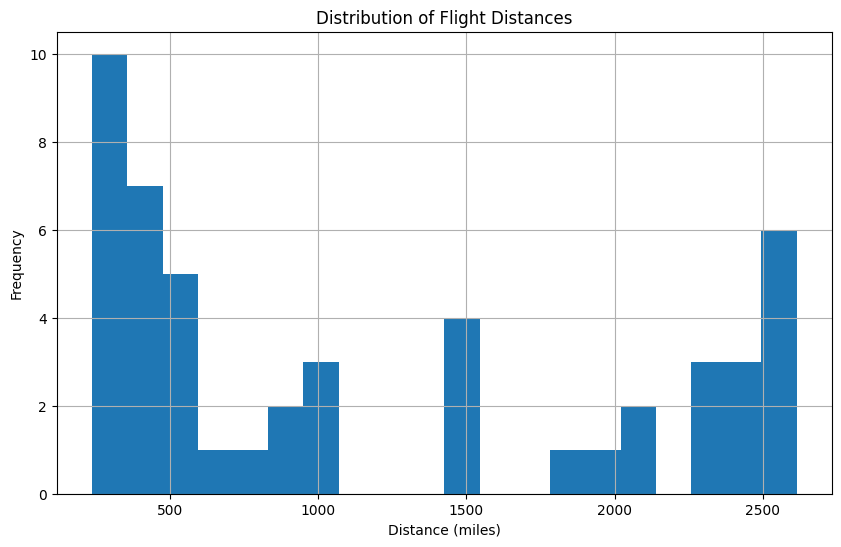

In [ ]:
# Question 6.3 for aircraft TAIL_NUM = N77520

# Calculate basic summary statistics
distance_stats = aircraft_2['DISTANCE'].describe()

print("Summary Statistics of Distance Traveled:")
print(distance_stats)

# Calculate additional statistics
total_distance = aircraft_2['DISTANCE'].sum()
num_flights = len(aircraft_2)
avg_distance_per_flight = total_distance / num_flights

print(f"\nTotal Distance Traveled: {total_distance:,.2f} miles")
print(f"Number of Flights: {num_flights}")
print(f"Average Distance per Flight: {avg_distance_per_flight:.2f} miles")

# Find the longest and shortest flights
longest_flight = aircraft_2.loc[aircraft_2['DISTANCE'].idxmax()]
shortest_flight = aircraft_2.loc[aircraft_2['DISTANCE'].idxmin()]

print("\nLongest Flight:")
print(f"From {longest_flight['ORIGIN']} to {longest_flight['DEST']}: {longest_flight['DISTANCE']} miles")

print("\nShortest Flight:")
print(f"From {shortest_flight['ORIGIN']} to {shortest_flight['DEST']}: {shortest_flight['DISTANCE']} miles")

# Visualize distance distribution
ax = aircraft_2['DISTANCE'].hist(bins=20, figsize=(10, 6))
ax.set_title('Distribution of Flight Distances')
ax.set_xlabel('Distance (miles)')
ax.set_ylabel('Frequency')

**Findings:** The most frequent traveling distance for aircraft N77520 is just under 500 miles at a frequency of 7 and greater. Surprisingly at a distance of over 2500 miles, it is the second most occured flying distance with a frequency of 6. Between 1100 miles and 1400 miles, 1600 miles and 1800 miles, 2200 and 2300 miles, and anything greater than 2700 miles, the aircraft has a frequency of 0.

In [ ]:
# Question 6.1 for aircraft TAIL_NUM = N8520Q

# Determines what airline the aircraft operates on and its top 5 most frequent routes
aircraft_3 = flight_data[flight_data['TAIL_NUM'] == 'N8520Q']
print(f"Airline operating N8520Q: {aircraft_3['CARRIER_CODE'].mode()[0]}")
print("\nTop 5 most frequent routes:")
print(aircraft_3.groupby(['ORIGIN', 'DEST'], observed=True).size().sort_values(ascending=False).head())

Airline operating N8520Q: WN

Top 5 most frequent routes:
ORIGIN  DEST
BUF     LAS     2
PHX     LAX     2
ABQ     LAS     1
PHX     STL     1
OAK     PDX     1
dtype: int64


**Findings:** Aircraft N8520Q is operated by WN, otherwise known as Southwest.
The top 5 most frequenct routes are (in order): Buffalo to Las Vegas, Phoenix to Los Angeles, Albuquerque to Las Vegas, Phoenix to St. Louis, and Oakland to Portland.

Average Delays at Airports:
     DEP_DELAY  ARR_DELAY  TOTAL_DELAY
MCO      27.50      14.00        41.50
PHL      13.00       0.00        13.00
GEG       6.75       3.75        10.50
BUF       9.50       0.50        10.00
LAS       5.40       1.90         7.30
PDX       6.00       0.00         6.00
ABQ       5.75       0.00         5.75
LAX       5.25       0.00         5.25
PHX       3.70       1.35         5.05
CLE       5.00       0.00         5.00
SEA       0.75       3.00         3.75
OAK       2.00       1.50         3.50
BWI       1.50       1.50         3.00
DEN       2.65       0.00         2.65
STL       2.00       0.00         2.00
BNA       2.00       0.00         2.00
DAL       1.25       0.00         1.25
SMF       1.00       0.00         1.00
CMH       1.00       0.00         1.00
IND       0.50       0.00         0.50
SFO       0.25       0.25         0.50
MKE       0.00       0.00         0.00
MDW       0.00       0.00         0.00
BOI       0.00       0.00         0.

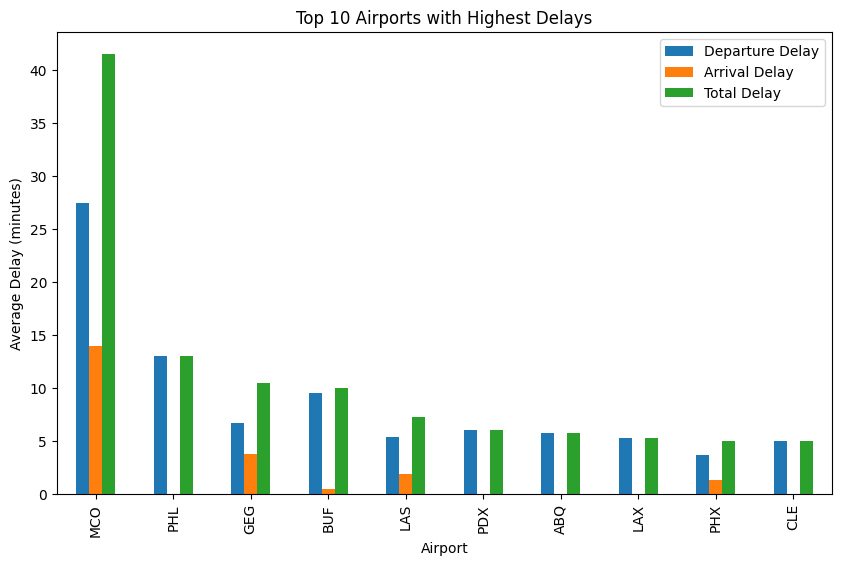

In [ ]:
# Question 6.2 for aircraft TAIL_NUM = N8520Q

# Calculates average delays for each airport
origin_delays = aircraft_3.groupby('ORIGIN', observed=True).agg({
    'DEP_DELAY': 'mean',
    'ARR_DELAY': 'mean'
}).round(1)

dest_delays = aircraft_3.groupby('DEST', observed=True).agg({
    'DEP_DELAY': 'mean',
    'ARR_DELAY': 'mean'
}).round(1)

# Combine origin and destination delays
all_delays = pd.concat([origin_delays, dest_delays]).groupby(level=0).mean()

# Sort by total delay (departure + arrival)
all_delays['TOTAL_DELAY'] = all_delays['DEP_DELAY'] + all_delays['ARR_DELAY']
all_delays_sorted = all_delays.sort_values('TOTAL_DELAY', ascending=False)

print("Average Delays at Airports:")
print(all_delays_sorted)

ax = all_delays_sorted.head(10).plot(kind='bar', figsize=(10, 6))
ax.set_title('Top 10 Airports with Highest Delays')
ax.set_xlabel('Airport')
ax.set_ylabel('Average Delay (minutes)')
ax.legend(['Departure Delay', 'Arrival Delay', 'Total Delay'])

**Findings:** The airport that has the highest average delay (minutes) is MCO Airport, otherwise known as Orlando International Airport. In second place is PHL airport, otherwise known as Philadelphia International Airport. In third is GEG Airport, otherwise known as Spokane International Airport. The airports with the lowest average delay is tied between three airports: LAX, PHX, AND CLE (
Los Angeles International Airport, Phoenix Sky Harbor International Airport, and Cleveland Hopkins International Airport).

Summary Statistics of Distance Traveled:
count      49.000000
mean     1102.469388
std       602.569605
min       258.000000
25%       605.000000
50%       909.000000
75%      1488.000000
max      2395.000000
Name: DISTANCE, dtype: float64

Total Distance Traveled: 54,021.00 miles
Number of Flights: 49
Average Distance per Flight: 1102.47 miles

Longest Flight:
From BWI to SMF: 2395 miles

Shortest Flight:
From LAS to SAN: 258 miles


Text(0, 0.5, 'Frequency')

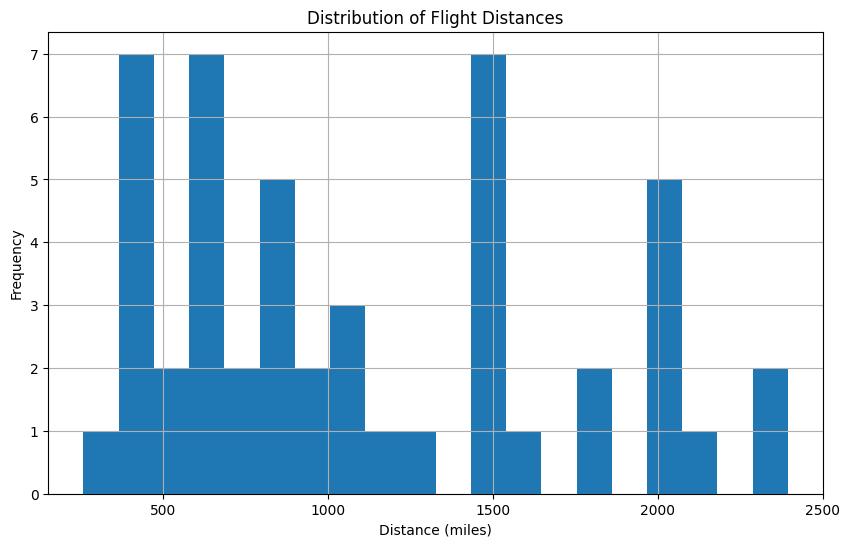

In [71]:
# Question 6.3 for aircraft TAIL_NUM = N8520Q

# Calculate basic summary statistics
distance_stats = aircraft_3['DISTANCE'].describe()

print("Summary Statistics of Distance Traveled:")
print(distance_stats)

# Calculate additional statistics
total_distance = aircraft_3['DISTANCE'].sum()
num_flights = len(aircraft_3)
avg_distance_per_flight = total_distance / num_flights

print(f"\nTotal Distance Traveled: {total_distance:,.2f} miles")
print(f"Number of Flights: {num_flights}")
print(f"Average Distance per Flight: {avg_distance_per_flight:.2f} miles")

# Find the longest and shortest flights
longest_flight = aircraft_3.loc[aircraft_3['DISTANCE'].idxmax()]
shortest_flight = aircraft_3.loc[aircraft_3['DISTANCE'].idxmin()]

print("\nLongest Flight:")
print(f"From {longest_flight['ORIGIN']} to {longest_flight['DEST']}: {longest_flight['DISTANCE']} miles")

print("\nShortest Flight:")
print(f"From {shortest_flight['ORIGIN']} to {shortest_flight['DEST']}: {shortest_flight['DISTANCE']} miles")

# Visualize distance distribution
ax = aircraft_3['DISTANCE'].hist(bins=20, figsize=(10, 6))
ax.set_title('Distribution of Flight Distances')
ax.set_xlabel('Distance (miles)')
ax.set_ylabel('Frequency')

**Findings:** For aircraft N8520Q, there is more of a random pattern compared to the previous two aircrafts. There are three distances where the frequency occurance is eqal: 400 miles, 700 miles, and 1500 miles. Between 1000-1500 miles and 1500-2000 miles, the frequency drastically drops, some having a frequency of 0. The longest distance this aircraft have flown is 2395 miles which doesn't have the lowest frequency rate as it has occured twice.

# Question 6 — Summary

Summarize the overall analysis and share THREE (3) key findings.

**Key Findings:**



---



***One*** - The frequency of flight follows a unique pattern that changes with distance. The majority of flights in the sky are short-haul flights, which are 500 miles or less in distance. By contrast, there is an apparent decrease in the frequency of medium-distance flights, which are those that travel between 1,000 and 2,000 miles. It's interesting to note that the number of flights starts to increase once again as the journey distance surpasses 2,000 miles, suggesting a revival of demand for long-haul travel. The intricate interactions between a variety of variables, including airline route tactics, passenger preferences, and industry economics, are reflected in this U-shaped distribution.

***Two*** - An airline's on-time performance percentage and flight hours seem to be strongly positively correlated. There is an almost perfect positive link, with a correlation coefficient of roughly 0.99 between flight hours and on-time performance. According to this relationship, airlines that operate more flights typically perform better when it comes to being on time. Improved punctuality may be linked to operational scale and experience.

***Three*** - The most popular arrival times were between approximately 1300 and 1500 hours, while the most popular departure times ranged from about 1000 to 1400 hours across all carriers. This concentration of flight activity during midday and early afternoon hours reveals important patterns in air travel demand. These are probably the times that most people prefer for daytime flights. To accommodate periods of strong demand, airlines might tailor their schedules. Based on the given information, airports and airlines should ensure they have enough resources and an efficient operating plan to keep customers' happy and decrease delay time since peak hours are determined.
